In [ ]:
!pip install baostock

In [17]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# login baostock
lg = bs.login()
print(f'error code {lg.error_code}')
print(f'error msg {lg.error_msg}')
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2022-07-01', end_date='2023-12-31',
    frequency="d", adjustflag="3")

login success!
error code 0
error msg success


In [25]:
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
df_result = pd.DataFrame(data_list, columns=rs.fields)

In [28]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         367 non-null    object
 1   code         367 non-null    object
 2   open         367 non-null    object
 3   high         367 non-null    object
 4   low          367 non-null    object
 5   close        367 non-null    object
 6   preclose     367 non-null    object
 7   volume       367 non-null    object
 8   amount       367 non-null    object
 9   adjustflag   367 non-null    object
 10  turn         367 non-null    object
 11  tradestatus  367 non-null    object
 12  pctChg       367 non-null    object
 13  isST         367 non-null    object
dtypes: object(14)
memory usage: 40.3+ KB


**逐条解释**  
date: 交易所日期  
code：证券代码，sh.600000是上海浦东发展银行股份有限公司，差得2022-07-01收盘价为¥7.99，符合一致  
open：开盘价  
high：最高价  
low：最低价  
close：收盘价  
preclose：前收盘价，即前一天收盘价用来参考  
volume：成交量（股） 
amount：成交额（人民币）  
adjustflag：复权状态(1：后复权， 2：前复权，3：不复权) 复权是为了消除如分红，拆细等操作的影响。  
turn：换手率， 也就是成交量在流通量里的占比。这里的换手率低于10%，属于偏低。  
tradestatus：交易状态(1：正常交易 0：停牌)  
pctChg：涨跌幅，[(指定交易日的收盘价-指定交易日前收盘价)/指定交易日前收盘价]*100%  
isST：中国市场上被打上特殊标记（special treatment），表示公司近期出现了一些财务问题，可能会被限制交易


**PE 市盈率**  
PE(Price-to-Earnings Ratio) = 股票当前价格 / 每股盈利  
EPS(Earnings Per Share)（每股盈利）= 净利润 / 加权平均普通股数量

**PS 市销率**  
PS(Price-to-Sales Ratio) = 股票市值 / 年销售收入
较低的市销率表示相对便宜，高成长的科技公司比较高，传统行业则比较低


**PB 市净率**  
PB(Price-to-Book Ratio) = 每股股价 / 每股净值  
Book指的是净值，即净资产

**PC 市现率**  
PC(Price-to-Cash Flow Ratio) = 股票市值 / 现金流  
衡量市值相对于现金流的比例

<Axes: >

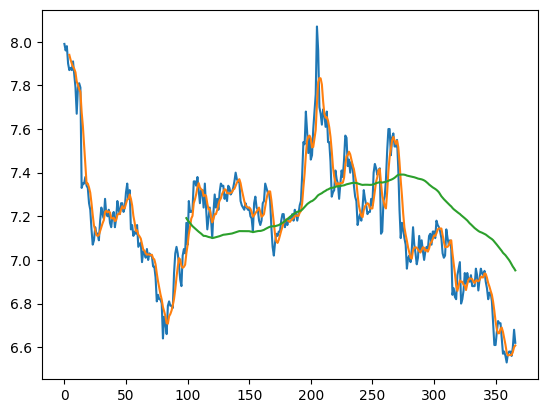

In [31]:
# Check the close price and rolling 5 / 100 average number
df_result['close'].astype(float).plot()
df_result['close'].astype(float).rolling(window=5).mean().plot()
df_result['close'].astype(float).rolling(window=100).mean().plot()